## Check the stationarity, trend and seasonality of the given data. How to Remove Trend &amp; Seasonality from Time-Series Data [Python]?

**Code credits:** [Mudit Golchha](https://github.com/mudit2004)

Both **Trends** and **Seasonality** are generally present in the majority of time series data of the real
world. When to do the forecasting with time series, need a **stationary time series.** The stationary
time series is time-series dataset where there is no trend or seasonality information present in it.
The stationary time series is a series with constant mean, constant variance, and constant
autocorrelation.

To make time series stationary, need to find a way to remove trends and seasonality from our
time series so that can use it with prediction models. To do that, need to understand what is
trends and seasonality in-depth to handle them better. Apart from trend and seasonality, some
time-series also have **noise/error/residual** component present as well. We can decompose time-
series to see different components.

Time-series are of generally two types:
- **Additive Time-Series:** Additive time-series is time-series where components (trend,
seasonality, noise) are added to generate time series.
> **Time-Series = trend + seasonality + noise**
- **Multiplicative Time-Series:** Multiplicative time-series is time-series where components
(trend, seasonality, noise) are multiplied to generate time series. one can notice an
increase in the amplitude of seasonality in multiplicative time-series.
> **Time-Series = trend seasonality noise**

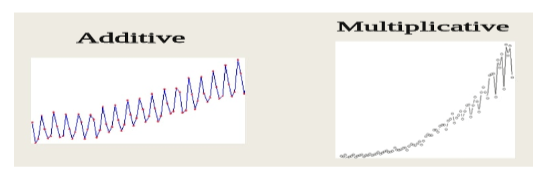

**2. Trend**
The trend represents an increase or decrease in time-series value over time. If we notice that the
value of measurement over time is increasing or decreasing then we can say that it has an upward
or downward trend.

**To remove trend from time-series data,** there are various ways to de-trend a time series.
- Log Transformation.
- Power Transformation.
- local smoothing - Applying moving window functions to time-series data.
- Differencing a time-series.
- Linear Regression.

**3. Seasonality**
The seasonality represents variations in measured value which repeats over the same time
interval regularly. If we notice that particular variations in value are happening every week,
month, quarter or half-yearly then we can say that time series has some kind of seasonality.

 **To remove seasonality from time-series data**, there are various ways and a bit complicated which include
- Average de-trended values.
- Differencing a time-series.
- Use the loess method.
  
**4. Load Time Series Dataset**
- Air Passengers Dataset - it has both trend and seasonality. It has information about US
airline passengers from 1949 to 1960 recorded each month.
- Download the dataset.
- Print few rows
- Plot the data

C:\Users\Admin\AppData\Local\Temp\ipykernel_9708\3323364953.py:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df["1952"].plot(kind="bar", color="tab:green", legend=False)


<Axes: xlabel='Month'>

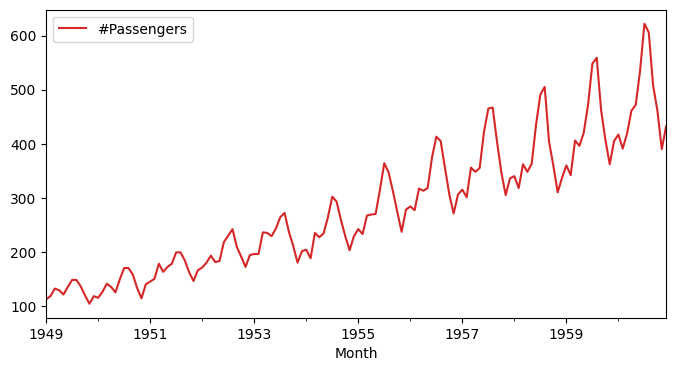

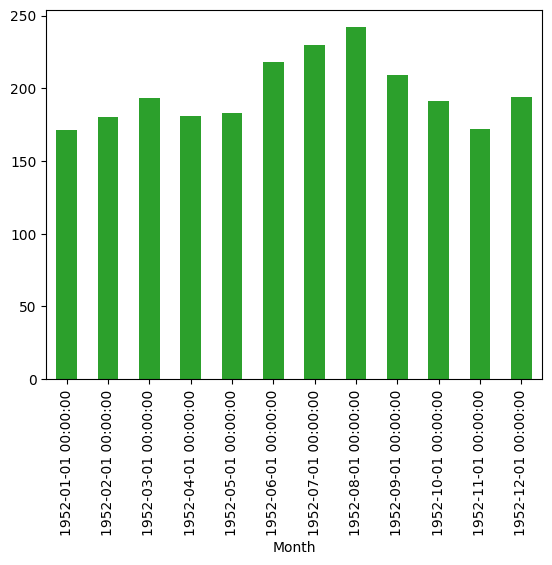

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'airline-passengers.csv', index_col=0, parse_dates=True)
df.head()
df.plot(figsize=(8,4), color="tab:red");
df["1952"].plot(kind="bar", color="tab:green", legend=False)

- See that our time-series is multiplicative time-series and has both trend as well as
seasonality.
- See the trend as passengers are constantly increasing over time.
- See seasonality with the same variations repeating for 1 year where value peaks
somewhere are around August.

**5. Decompose Time-Series to See Components (Trend, Seasonality, Noise, etc)**

Decompose time-series to see various components of time-series. Python module
named statmodels provides us with easy to use utility which we can use to get an individual
component of time-series and then visualize it.

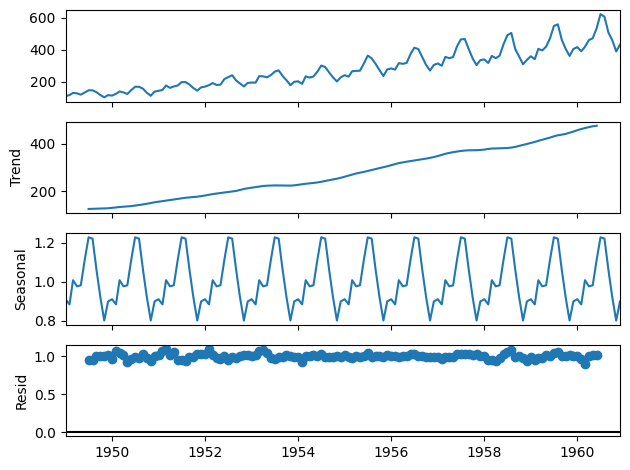

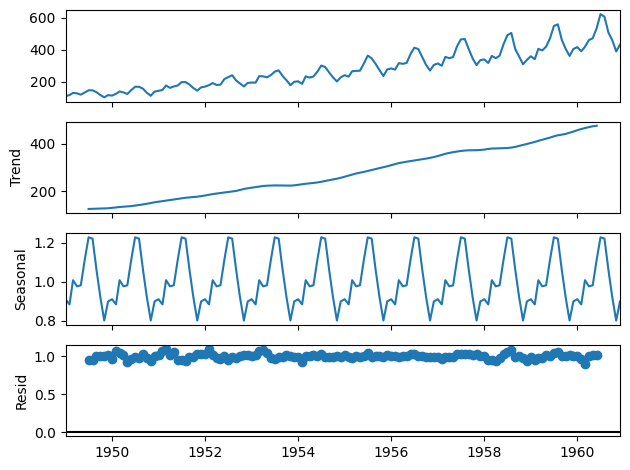

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(df, model="multiplicative")
trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid
decompose_result.plot()

Observe the trend and seasonality components separately as well as residual components. There
is a loss of residual in the beginning which is settling later.

**6. Checking Whether Time-Series is Stationary or Not**
The above time-series is stationary whose mean, variance and auto-covariance are independent
of time. Can check mean, variance and auto-covariance using moving window functions
available with pandas. Also use a dicky-fuller test available with statsmodels to check the
stationarity of time-series. If time-series is not stationary then need to make it stationary.
- Below have taken an average over moving window of 12 samples.
- We noticed from the above plots that there is the seasonality of 12 months in time-series.
- We can try different window sizes for testing purposes.

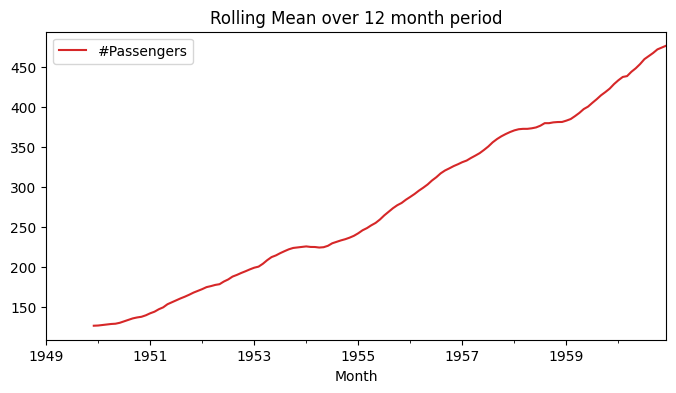

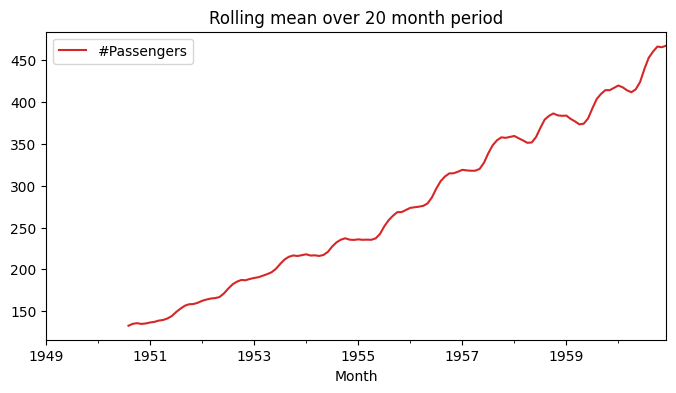

In [5]:
df.rolling(window = 12).mean().plot(figsize=(8,4), color="tab:red", title="Rolling Mean over 12 month period");
df.rolling(window = 20).mean().plot(figsize=(8,4), color="tab:red", title="Rolling mean over 20 month period");

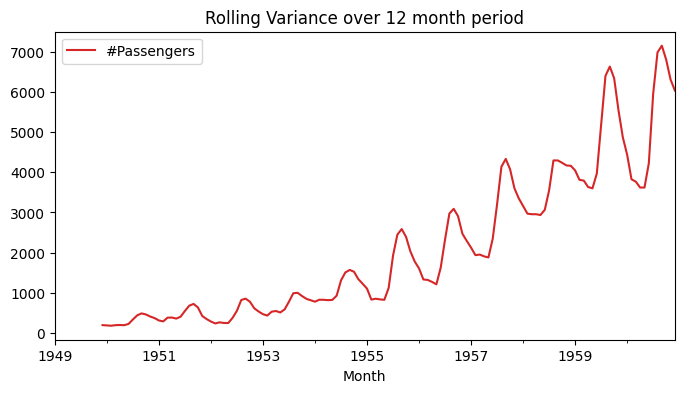

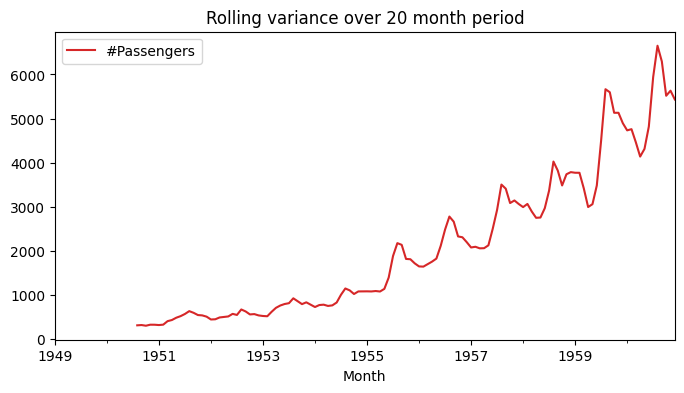

In [6]:
df.rolling(window = 12).var().plot(figsize=(8,4), color="tab:red", title="Rolling Variance over 12 month period");
df.rolling(window = 20).var().plot(figsize=(8,4), color="tab:red", title="Rolling variance over 20 month period");

From the above two plots, notice that time series has some kind of multiplicative effect which
seems to be increasing with time period. Also can see the low seasonality effect at the beginning
which amplifies over time.
    
Below, plotting an auto-correlation plot for time-series data as well. This plot helps us
understand whether present values of time series are positively correlated, negatively correlated,
or not related at all to past values. statsmodels library provides ready to use method **plot_acf** as
a part of module **statsmodels.graphics.tsaplots.**

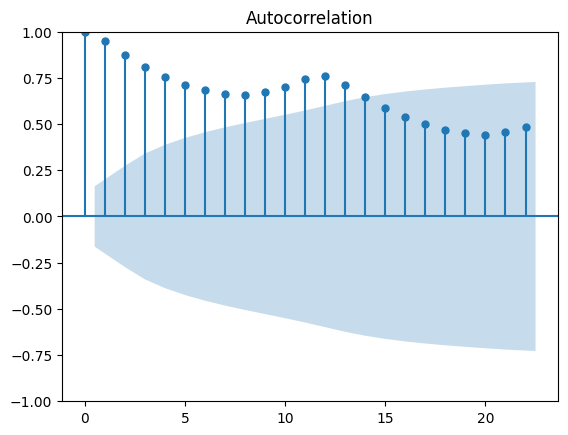

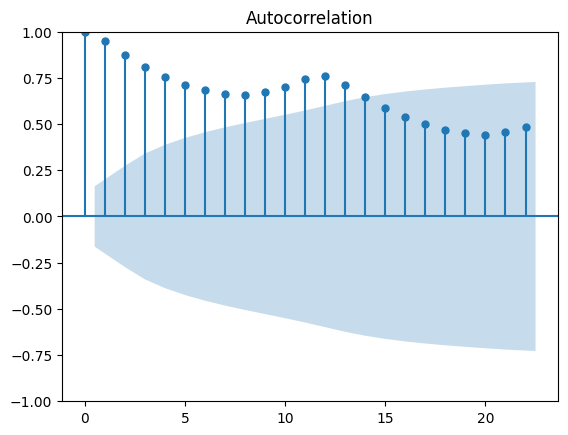

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

Notice from the above chart that after 13 lags, the line gets inside confidence interval (light blue
area). This can be due to seasonality of 12-13 months in our data.

**Dicky-Fuller Test for Stationarity**

Once removed trend and seasonality from time-series data then test its stationarity using a dicky-
fuller test. It#s a statistical test to check the stationarity of time-series data, available with
the statsmodels library.

In [9]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['#Passengers'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  0.8153688792060482
2. P-Value :  0.991880243437641
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


We can interpret above results based on p-values of result.
- p-value &gt; 0.05 - This implies that time-series is non-stationary.
- p-value &lt;=0.05 - This implies that time-series is stationary.
- We can see from the above results that p-value is greater than 0.05 hence our time-series
is not stationary. It still has time-dependent components present which we need to
remove.

**7. Remove Trend** 
There are various ways to remove trends from data as we have discussed above. Here try ways
like differencing, power transformation, log transformation, etc.

> **7.1 Logged Transformation**
To apply log transformation, need to take a log of each individual value of time-series data.

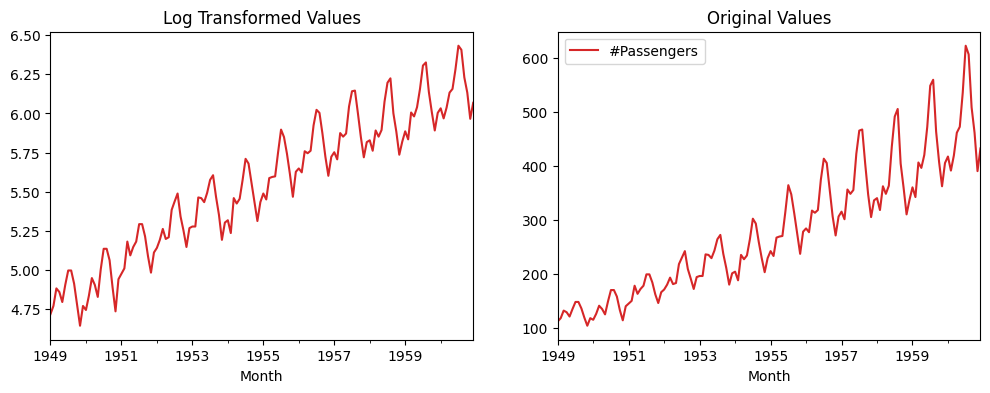

In [11]:
logged_passengers = df["#Passengers"].apply(lambda x : np.log(x))
ax1 = plt.subplot(121)
logged_passengers.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Values",ax=ax1);
ax2 = plt.subplot(122)
df.plot(color="tab:red", title="Original Values", ax=ax2);

From the plot, can see that we have reduced the variance of time-series data. We can look at y-
values of original time-series data and log-transformed time-series data to conclude that the
variance of time-series is reduced. And also can check whether we are successful or not by
checking individual components of time-series by decomposing it.
decompose_result = seasonal_decompose(logged_passengers)
decompose_result.plot();
NOTE
Please make a NOTE that our time series has both trend and seasonality. We are trying various
techniques to remove trend in this section. The next section builds on this section and explains
various techniques to remove stationarity. Test stationarity after this section if your time series
only has trend.
<br>
>**7.2 Power Transformations**
We can apply power transformation in data same way as that of log transformation to remove
trend.

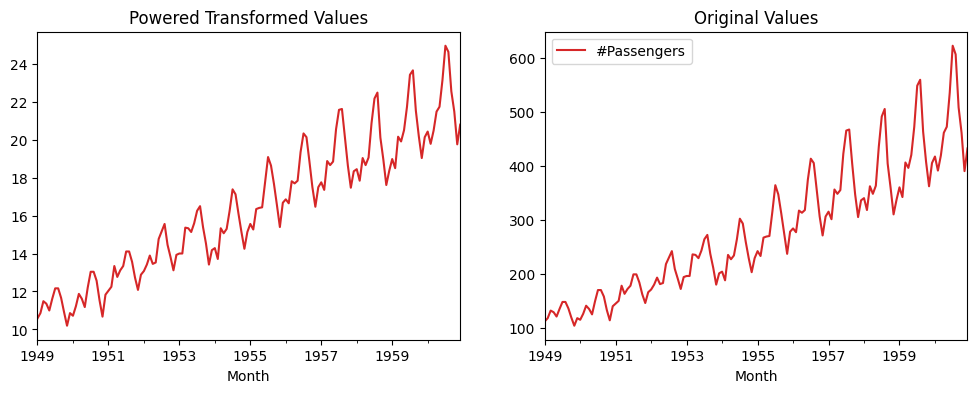

In [13]:
powered_passengers = df["#Passengers"].apply(lambda x : x ** 0.5)
ax1 = plt.subplot(121)
powered_passengers.plot(figsize=(12,4), color="tab:red", title="Powered Transformed Values",ax=ax1);
ax2 = plt.subplot(122)
df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

From the plot, can see that, have reduced the variance of time-series data. Look at y-values of
original time-series data and power-transformed time-series data to conclude that the variance of
time-series is reduced. Check whether are successful or not by checking individual components
of time-series by decomposing it.

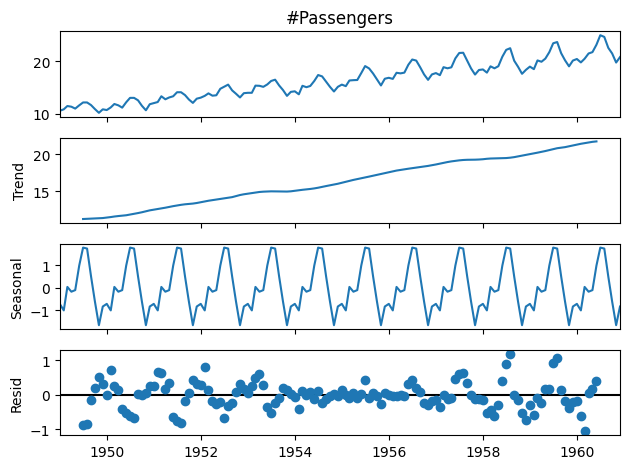

In [14]:
decompose_result = seasonal_decompose(powered_passengers)
decompose_result.plot();

>**7.3 Applying Moving Window Functions**
Calculate rolling mean over a period of 12 months and subtract it from original time-series to get
de-trended time-series.

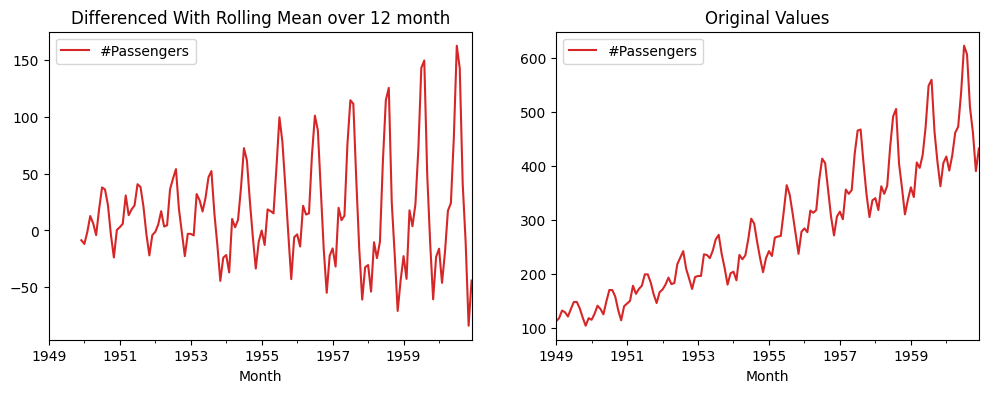

In [15]:
rolling_mean = df.rolling(window = 12).mean()
passengers_rolled_detrended = df - rolling_mean
ax1 = plt.subplot(121)
passengers_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

From the above the first chart, we can see that we seem to have removed trend from time-series
data.
Check whether we are successful or not by checking individual components of time-series by
decomposing it as we had done above.

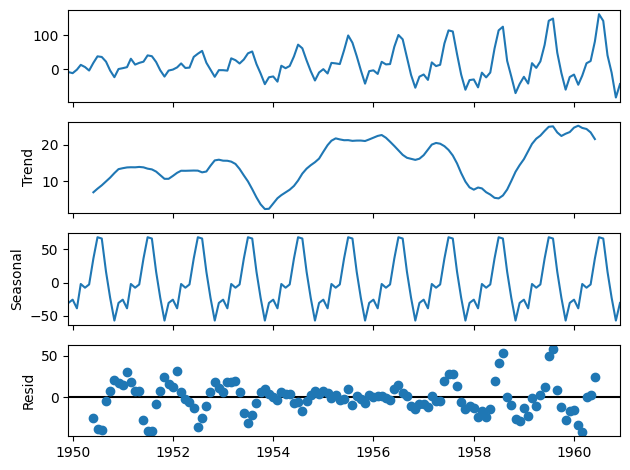

In [16]:
decompose_result = seasonal_decompose(passengers_rolled_detrended.dropna())
decompose_result.plot();

> **7.4 Applying Moving Window Function on Log Transformed Time-Series**
    We can apply more than one transformation as well. We&#39;ll first apply log transformation to time-
series, then take a rolling mean over a period of 12 months and then subtract rolled time-series
from log-transformed time-series to get final time-series.

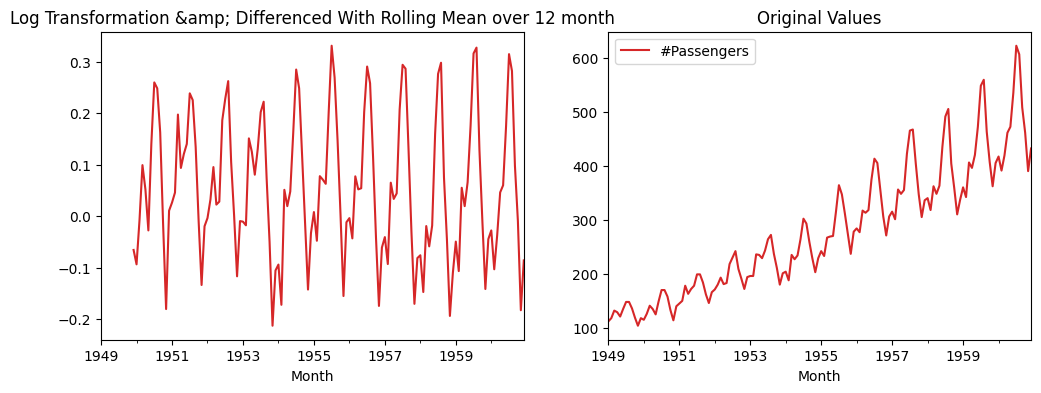

In [18]:
logged_passengers = pd.DataFrame(df["#Passengers"].apply(lambda x : np.log(x)))
rolling_mean = logged_passengers.rolling(window = 12).mean()
passengers_log_rolled_detrended = logged_passengers["#Passengers"] - rolling_mean["#Passengers"]
ax1 = plt.subplot(121)
passengers_log_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Log Transformation &amp; Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

From the above the first chart, see that we are able to removed the trend from time-series data.
Check whether we are successful or not by checking individual components of time-series by
decomposing it.

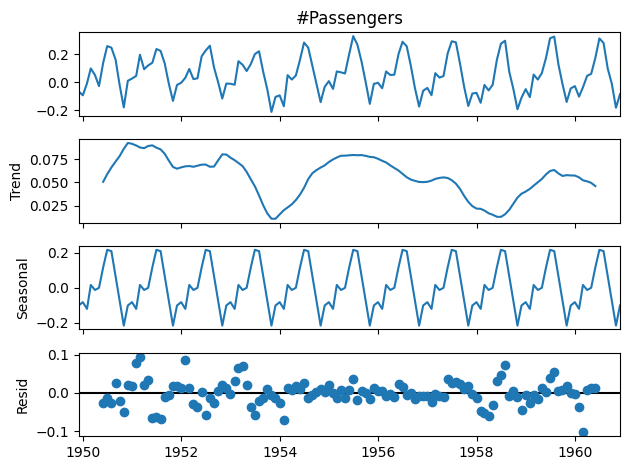

In [19]:
decompose_result = seasonal_decompose(passengers_log_rolled_detrended.dropna())
decompose_result.plot();

> **7.5 Applying Moving Window Function on Power Transformed Time-Series**
 Apply more than one transformation as well. We&#39;ll first apply power transformation to time-
series, then take a rolling mean over a period of 12 months and then subtract rolled time-series
from power-transformed time-series to get final time-series.

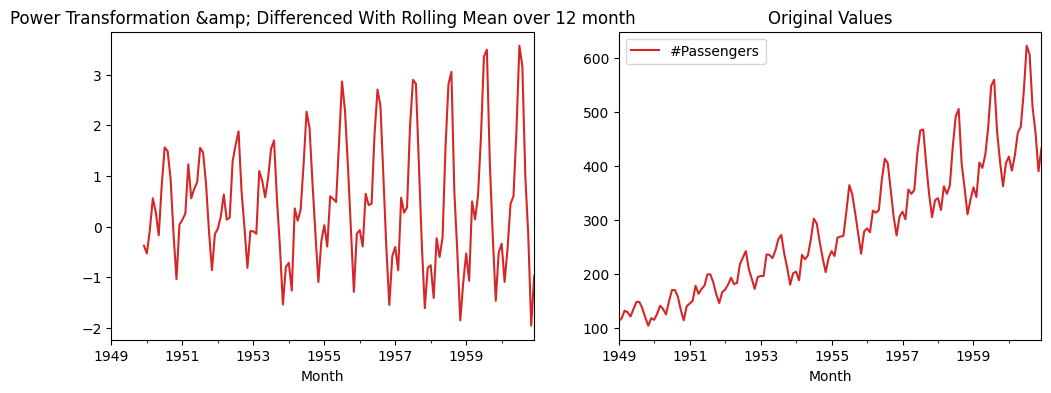

In [21]:
powered_passengers = pd.DataFrame(df["#Passengers"].apply(lambda x : x **0.5))
rolling_mean = powered_passengers.rolling(window = 12).mean()
passengers_pow_rolled_detrended = powered_passengers["#Passengers"] -rolling_mean["#Passengers"]
ax1 = plt.subplot(121)
passengers_pow_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Power Transformation &amp; Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

From the plot, can see that we are able to remove the trend from time-series data. Check whether
we are successful or not by checking individual components of time-series by decomposing it.

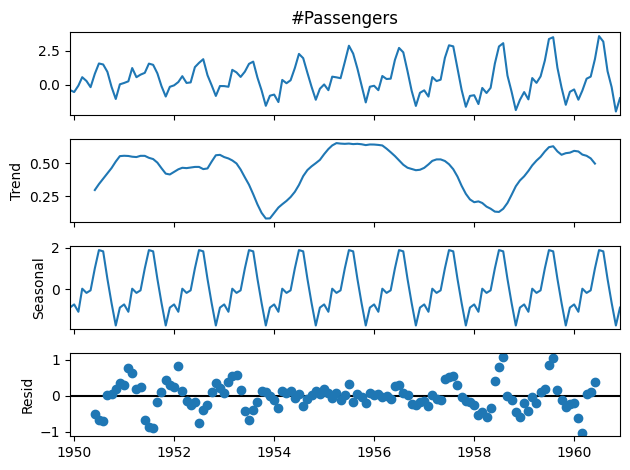

In [23]:
decompose_result = seasonal_decompose(passengers_pow_rolled_detrended.dropna())
decompose_result.plot();

>**7.6 Applying Linear Regression to Remove Trend**
Apply a linear regression model to remove the trend. Fit a linear regression model to our time-
series data.
>- Using a fit model to predict time-series values from beginning to end.
>- Then subtracting predicted values from original time-series to remove the trend.

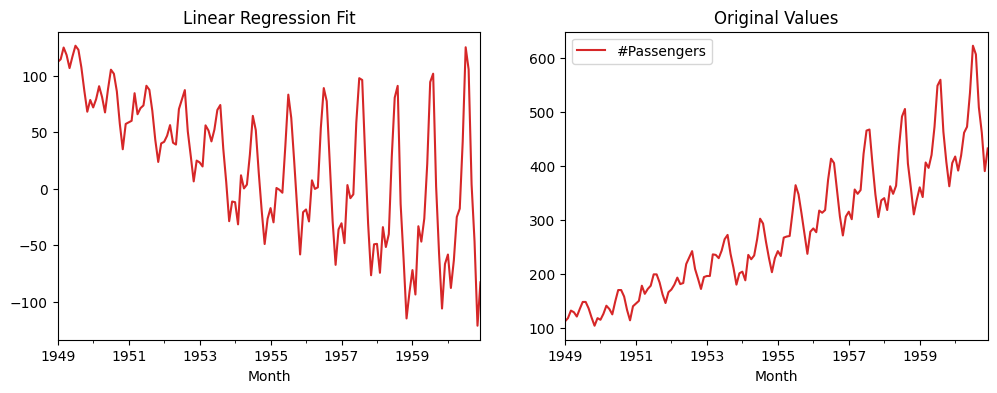

In [28]:
from statsmodels.regression.linear_model import OLS
least_squares = OLS(df["#Passengers"].values, list(range(df.shape[0])))
result = least_squares.fit()
fit = pd.Series(result.predict(list(range(df.shape[0]))), index = df.index)
passengers_ols_detrended = df["#Passengers"] - fit
ax1 = plt.subplot(121)
passengers_ols_detrended.plot(figsize=(12,4), color="tab:red", title="Linear Regression Fit", ax=ax1);
ax2 = plt.subplot(122)
df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

From the plot, see that we are able to remove the trend from time-series data. Check whether we
are successful or not by checking individual components of time-series by decomposing it.

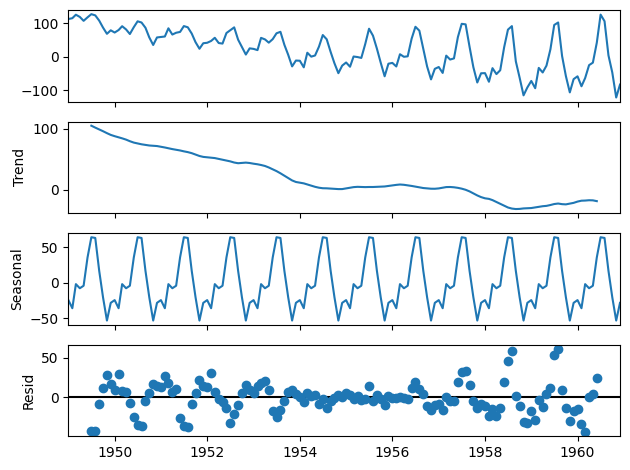

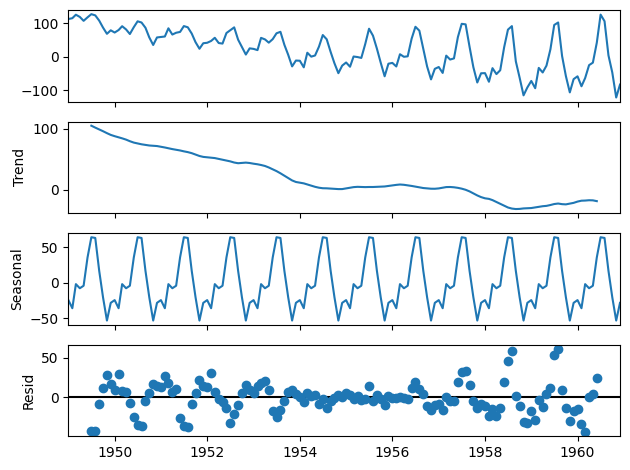

In [29]:
decompose_result = seasonal_decompose(passengers_ols_detrended.dropna())
decompose_result.plot()

After applying the above transformations, can say that linear regression seems to have done a
good job of removing the trend than other methods. Confirm it further whether it actually did
good by removing the seasonal component and checking stationarity of time-series.

**8. Remove Seasonality**
Now remove seasonality by differencing technique. Ise differencing over various de-trended
time-series calculated above.

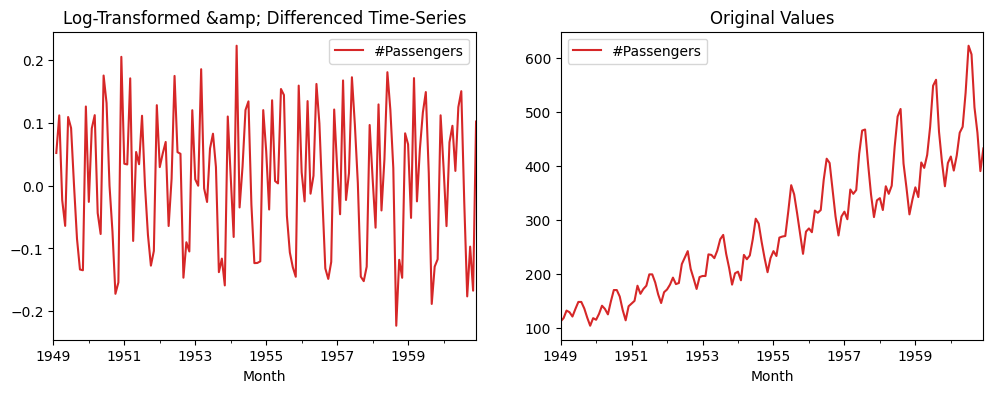

In [31]:
air_passengers = df
logged_passengers_diff = logged_passengers - logged_passengers.shift()
ax1 = plt.subplot(121)
logged_passengers_diff.plot(figsize=(12,4), color="tab:red", title="Log-Transformed &amp; Differenced Time-Series", ax=ax1)
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [33]:
dftest = adfuller(logged_passengers_diff.dropna()["#Passengers"].values, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",
dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.717130598388133
2. P-Value :  0.07112054815085875
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 128
5. Critical Values :
	 1% :  -3.4825006939887997
	 5% :  -2.884397984161377
	 10% :  -2.578960197753906


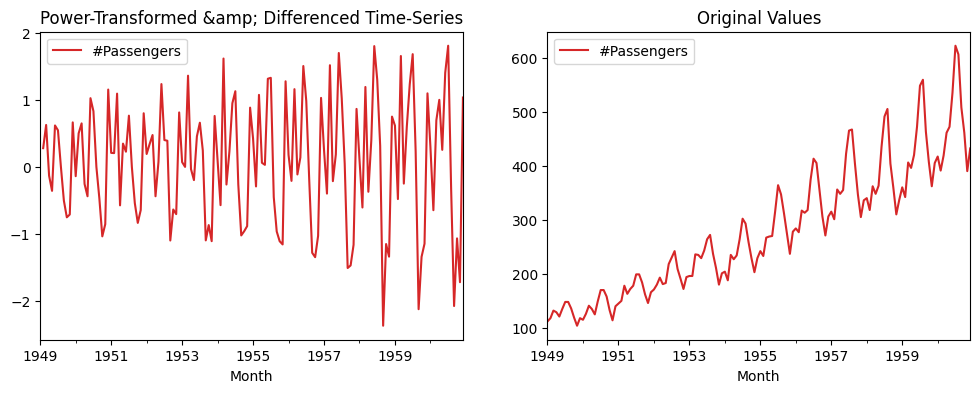

In [37]:
powered_passengers_diff = powered_passengers - powered_passengers.shift()
ax1 = plt.subplot(121)
powered_passengers_diff.plot(figsize=(12,4), color="tab:red", title="Power-Transformed &amp; Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [38]:
dftest = adfuller(powered_passengers_diff["#Passengers"].dropna().values, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",
dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.1864222911642144
2. P-Value :  0.020784185571266895
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


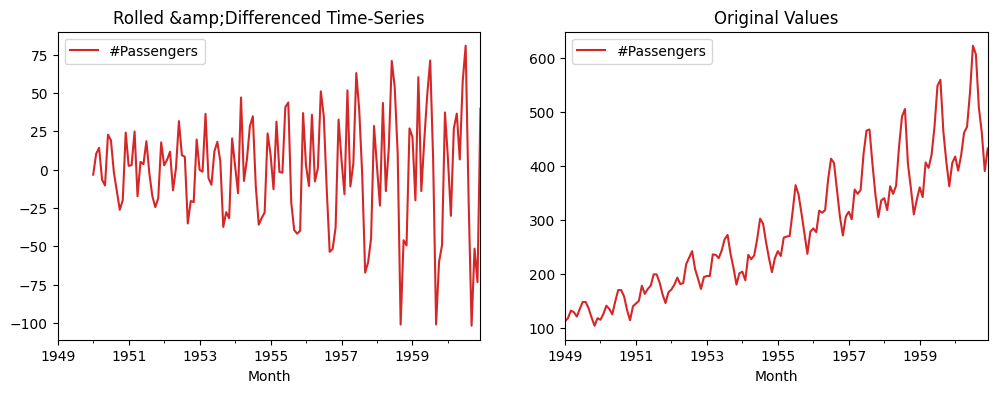

In [39]:
passengers_rolled_detrended_diff = passengers_rolled_detrended - passengers_rolled_detrended.shift()
ax1 = plt.subplot(121)
passengers_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Rolled &amp;Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [40]:
dftest = adfuller(passengers_rolled_detrended_diff.dropna()["#Passengers"].values, autolag ='AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",
dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.1544826348635864
2. P-Value :  0.02277526496785854
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 119
5. Critical Values :
	 1% :  -3.4865346059036564
	 5% :  -2.8861509858476264
	 10% :  -2.579896092790057


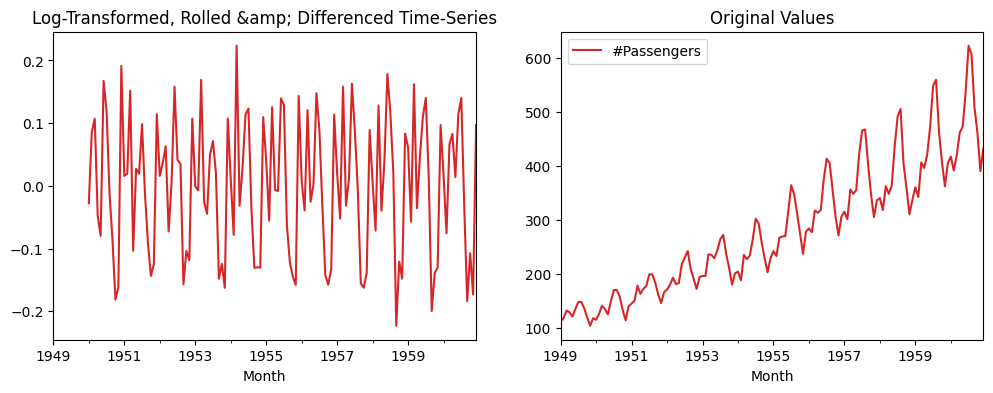

In [42]:
passengers_log_rolled_detrended_diff = passengers_log_rolled_detrended -passengers_log_rolled_detrended.shift()
ax1 = plt.subplot(121)
passengers_log_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Log-Transformed, Rolled &amp; Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [44]:
dftest = adfuller(passengers_log_rolled_detrended_diff.dropna().values, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",
dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.9129812454195063
2. P-Value :  0.001941362376936528
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 118
5. Critical Values :
	 1% :  -3.4870216863700767
	 5% :  -2.8863625166643136
	 10% :  -2.580009026141913


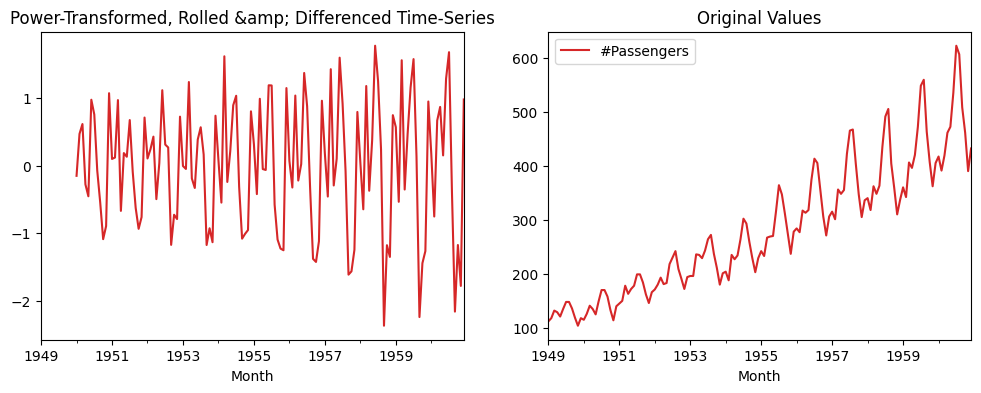

In [46]:
passengers_pow_rolled_detrended_diff = passengers_pow_rolled_detrended - passengers_pow_rolled_detrended.shift()
ax1 = plt.subplot(121)
passengers_pow_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Power-Transformed, Rolled &amp; Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [48]:
dftest = adfuller(passengers_pow_rolled_detrended_diff.dropna().values, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",
dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.6224853361907
2. P-Value :  0.0053454239582630585
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 118
5. Critical Values :
	 1% :  -3.4870216863700767
	 5% :  -2.8863625166643136
	 10% :  -2.580009026141913


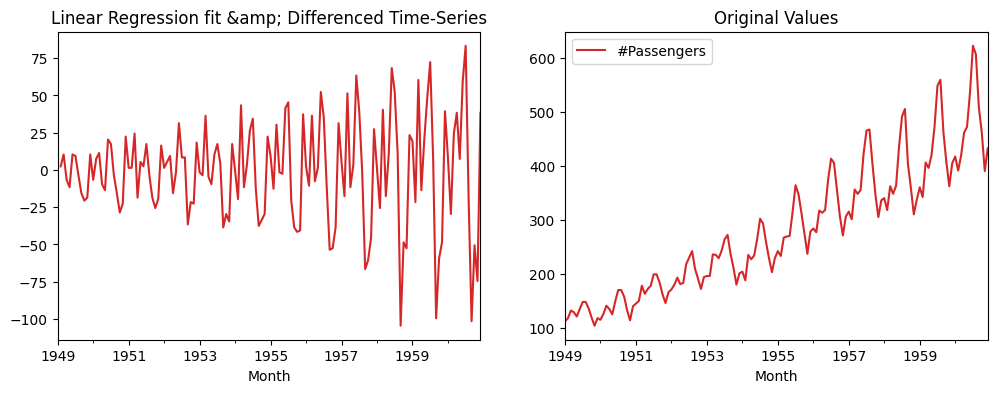

In [49]:
passengers_ols_detrended_diff = passengers_ols_detrended - passengers_ols_detrended.shift()
ax1 = plt.subplot(121)
passengers_ols_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Linear Regression fit &amp; Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [50]:
dftest = adfuller(passengers_pow_rolled_detrended_diff.dropna().values, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :",
dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.6224853361907
2. P-Value :  0.0053454239582630585
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 118
5. Critical Values :
	 1% :  -3.4870216863700767
	 5% :  -2.8863625166643136
	 10% :  -2.580009026141913
